<a href="https://colab.research.google.com/github/GiseC/TelecomX2/blob/main/TP2_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelado Predictivo para la Evasi√≥n de Clientes en Telecom X

El presente proyecto tiene como objetivo desarrollar un pipeline robusto de modelado predictivo orientado a identificar con anticipaci√≥n los clientes con mayor probabilidad de cancelar sus servicios en Telecom X, empresa que enfrenta una tasa de evasi√≥n del 26,5%.

El notebook incluye preparaci√≥n de datos, an√°lisis exploratorio dirigido, selecci√≥n/creaci√≥n de variables, entrenamiento de **m√∫ltiples modelos**, evaluaci√≥n con **m√©tricas de clasificaci√≥n**, e **interpretabilidad** (importancia de variables y coeficientes).

> **Archivos base**: se parte del dataset limpio subido trabajado en la primera parte del Challenge de Alura LATAM.

**Si el nombre de la columna objetivo difiere de `Evasion_bin`/`Churn`, el notebook intentar√° detectarla autom√°ticamente.**

El resultado final no solo es un clasificador predictivo, sino tambi√©n un insumo anal√≠tico para comprender los factores subyacentes que impulsan la cancelaci√≥n de servicios, sentando las bases para una estrategia de retenci√≥n basada en datos.

## Preprocesamiento de datos
Limpieza, transformaci√≥n y codificaci√≥n de variables categ√≥ricas y num√©ricas, asegurando la calidad y homogeneidad de los datos para el modelado.


In [445]:
#Importacion de Librerias
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, confusion_matrix, roc_curve, roc_auc_score)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample


In [446]:
# Exploraci√≥n inicial de datos

# Cargamos dataset
df = pd.read_csv("df_limpo.csv")
df.head()

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.DeviceProtection  \
0                      DSL  ...                        No   
1                      DSL  ...                        No   
2              Fiber optic  ...                       Yes   
3              Fiber optic  ...                       Yes   
4              Fiber optic  ...                        No   

  internet.TechSupport internet.StreamingTV internet.StreamingMovies  \
0                  Yes                  Yes                       No   
1                   No                   No                      Yes   
2                   No                   No                       No   
3                   No                  Yes                      Yes   
4                  Yes                  Yes                       No   

  account.Contract account.PaperlessBilling account.PaymentMethod Total.Day  \
0         One year                      Yes          Mailed check      2.20   
1   Month-to-month                       No          Mailed check      2.01   
2   Month-to-month                      Yes      Electronic check      2.34   
3   Month-to-month                      Yes      Electronic check      3.17   
4   Month-to-month                      Yes          Mailed check      2.97   

  account.Charges.Monthly  account.Charges.Total  
0                    65.6                 593.30  
1                    59.9                 542.40  
2                    73.9                 280.85  
3                    98.0                1237.85  
4                    83.9                 267.40  

[5 rows x 22 columns]

##Diccionario de datos

*   customerID: n√∫mero de identificaci√≥n √∫nico de cada cliente
*   Churn: si el cliente dej√≥ o no la empresa
*   gender: g√©nero (masculino y femenino)
*   SeniorCitizen: informaci√≥n sobre si un cliente tiene o no una edad igual o mayor a 65 a√±os
*   Partner: si el cliente tiene o no una pareja
*   Dependents: si el cliente tiene o no dependientes
*   tenure: meses de contrato del cliente
*   PhoneService: suscripci√≥n al servicio telef√≥nico
*   MultipleLines: suscripci√≥n a m√°s de una l√≠nea telef√≥nica
*   InternetService: suscripci√≥n a un proveedor de internet
*   OnlineSecurity: suscripci√≥n adicional de seguridad en l√≠nea
*   OnlineBackup: suscripci√≥n adicional de respaldo en l√≠nea
*   DeviceProtection: suscripci√≥n adicional de protecci√≥n del dispositivo
*   TechSupport: suscripci√≥n adicional de soporte t√©cnico, menor tiempo de espera
*   StreamingTV: suscripci√≥n de televisi√≥n por cable
*   StreamingMovies: suscripci√≥n de streaming de pel√≠culas
*   Contract: tipo de contrato
*   PaperlessBilling: si el cliente prefiere recibir la factura en l√≠nea
*   PaymentMethod: forma de pago
*   Charges.Monthly: total de todos los servicios del cliente por mes
*   Charges.Total: total gastado por el cliente

##An√°lisis exploratorio y selecci√≥n de variables
Evaluaci√≥n de correlaciones (Pearson), an√°lisis bivariado a fin de identificar los predictores m√°s relevantes del churn.

In [447]:
#Estructura general
print("üìå Dimensiones del dataset:", df.shape)
print("\nüìå Tipos de datos:\n")
print(df.dtypes)

üìå Dimensiones del dataset: (7043, 22)

üìå Tipos de datos:

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
Total.Day                    float64
account.Charges.Monthly      float64
account.Charges.Total        float64
dtype: object


In [448]:
#Valores faltantes
print("\nüìå Valores nulos por columna:\n")
print(df.isnull().sum())


üìå Valores nulos por columna:

customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
Total.Day                    11
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [449]:
# Distribuci√≥n de la variable objetivo (Churn)
print("\nüìå Distribuci√≥n de la variable objetivo (Churn):\n")
print(df["Churn"].value_counts())
print("\nProporci√≥n:\n")
print(df["Churn"].value_counts(normalize=True))


üìå Distribuci√≥n de la variable objetivo (Churn):

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporci√≥n:

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [450]:
#Creamos columna Churn_bin de tipo binario
#df['Churn_bin'] = df['Churn'].map({'No': 0, 'Yes': 1}).astype(int)

# Mostrar las primeras filas para verificar la nueva columna y su tipo de dato
display(df.head())
display(df.dtypes)

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.DeviceProtection  \
0                      DSL  ...                        No   
1                      DSL  ...                        No   
2              Fiber optic  ...                       Yes   
3              Fiber optic  ...                       Yes   
4              Fiber optic  ...                        No   

  internet.TechSupport internet.StreamingTV internet.StreamingMovies  \
0                  Yes                  Yes                       No   
1                   No                   No                      Yes   
2                   No                   No                       No   
3                   No                  Yes                      Yes   
4                  Yes                  Yes                       No   

  account.Contract account.PaperlessBilling account.PaymentMethod Total.Day  \
0         One year                      Yes          Mailed check      2.20   
1   Month-to-month                       No          Mailed check      2.01   
2   Month-to-month                      Yes      Electronic check      2.34   
3   Month-to-month                      Yes      Electronic check      3.17   
4   Month-to-month                      Yes          Mailed check      2.97   

  account.Charges.Monthly  account.Charges.Total  
0                    65.6                 593.30  
1                    59.9                 542.40  
2                    73.9                 280.85  
3                    98.0                1237.85  
4                    83.9                 267.40  

[5 rows x 22 columns]

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
Total.Day                    float64
account.Charges.Monthly      float64
account.Charges.Total        float64
dtype: object

In [451]:
#Estad√≠sticas descriptivas de variables num√©ricas
print("\nüìå Estad√≠sticas descriptivas (num√©ricas):\n")
print(df.describe())


üìå Estad√≠sticas descriptivas (num√©ricas):

       customer.SeniorCitizen  customer.tenure    Total.Day  \
count             7043.000000      7043.000000  7032.000000   
mean                 0.162147        32.371149     2.159879   
std                  0.368612        24.559481     1.006217   
min                  0.000000         0.000000     0.460000   
25%                  0.000000         9.000000     1.207500   
50%                  0.000000        29.000000     2.350000   
75%                  0.000000        55.000000     3.010000   
max                  1.000000        72.000000     4.050000   

       account.Charges.Monthly  account.Charges.Total  
count              7043.000000            7032.000000  
mean                 64.761692            2283.300441  
std                  30.090047            2266.771362  
min                  18.250000              18.800000  
25%                  35.500000             401.450000  
50%                  70.350000            1397.4

In [452]:
# Resumen de variables categ√≥ricas
print("\nüìå Resumen de variables categ√≥ricas:\n")
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"\n{col}:\n", df[col].value_counts().head(10))  # top 10 categor√≠as


üìå Resumen de variables categ√≥ricas:


customerID:
 customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
9967-ATRFS    1
9965-YOKZB    1
9964-WBQDJ    1
9962-BFPDU    1
9961-JBNMK    1
Name: count, dtype: int64

Churn:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

customer.gender:
 customer.gender
Male      3555
Female    3488
Name: count, dtype: int64

customer.Partner:
 customer.Partner
No     3641
Yes    3402
Name: count, dtype: int64

customer.Dependents:
 customer.Dependents
No     4933
Yes    2110
Name: count, dtype: int64

phone.PhoneService:
 phone.PhoneService
Yes    6361
No      682
Name: count, dtype: int64

phone.MultipleLines:
 phone.MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

internet.InternetService:
 internet.InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

internet.OnlineSecurity:
 internet.O

In [453]:
# Filtrar filas donde 'account.Charges.Total' es nulo
filas_con_nulos = df[df['account.Charges.Total'].isnull()]

# Mostrar las filas filtradas
display(filas_con_nulos)

customerID Churn customer.gender  customer.SeniorCitizen  \
945   1371-DWPAZ    No          Female                       0   
1731  2520-SGTTA    No          Female                       0   
1906  2775-SEFEE    No            Male                       0   
2025  2923-ARZLG    No            Male                       0   
2176  3115-CZMZD    No            Male                       0   
2250  3213-VVOLG    No            Male                       0   
2855  4075-WKNIU    No          Female                       0   
3052  4367-NUYAO    No            Male                       0   
3118  4472-LVYGI    No          Female                       0   
4054  5709-LVOEQ    No          Female                       0   
5433  7644-OMVMY    No            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
945               Yes                 Yes                0                 No   
1731              Yes                 Yes                0                Yes   
1906               No                 Yes                0                Yes   
2025              Yes                 Yes                0                Yes   
2176               No                 Yes                0                Yes   
2250              Yes                 Yes                0                Yes   
2855              Yes                 Yes                0                Yes   
3052              Yes                 Yes                0                Yes   
3118              Yes                 Yes                0                 No   
4054              Yes                 Yes                0                Yes   
5433              Yes                 Yes                0                Yes   

     phone.MultipleLines internet.InternetService  ...  \
945     No phone service                      DSL  ...   
1731                  No                       No  ...   
1906                 Yes                      DSL  ...   
2025                  No                       No  ...   
2176                  No                       No  ...   
2250                 Yes                       No  ...   
2855                 Yes                      DSL  ...   
3052                 Yes                       No  ...   
3118    No phone service                      DSL  ...   
4054                  No                      DSL  ...   
5433                  No                       No  ...   

     internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
945                        Yes                  Yes                  Yes   
1731       No internet service  No internet service  No internet service   
1906                        No                  Yes                   No   
2025       No internet service  No internet service  No internet service   
2176       No internet service  No internet service  No internet service   
2250       No internet service  No internet service  No internet service   
2855                       Yes                  Yes                  Yes   
3052       No internet service  No internet service  No internet service   
3118                       Yes                  Yes                  Yes   
4054                       Yes                   No                  Yes   
5433       No internet service  No internet service  No internet service   

     internet.StreamingMovies account.Contract account.PaperlessBilling  \
945                        No         Two year                       No   
1731      No internet service         Two year                       No   
1906                       No         Two year                      Yes   
2025      No internet service         One year                      Yes   
2176      No internet service         Two year                       No   
2250      No internet service         Two year                       No   
2855                       No         Two year                       No   
3052      No internet service 

##Tratamiento de los datos


Se observan datos en Charges.Total con nulos, se eliminan para limpiar datos.

Eliminaci√≥n de columnas que no aportan valor al an√°lisis o a los modelos predictivos. Estas columnas no ayudan en la predicci√≥n de la cancelaci√≥n.

In [454]:
# Reemplazar valores nulos en 'account.Charges.Total' por 0.0
df["account.Charges.Total"] = df["account.Charges.Total"].fillna(0.0)

# Verificar si a√∫n quedan nulos en la columna
print("Valores nulos en account.Charges.Total:", df["account.Charges.Total"].isnull().sum())

# Mostrar algunos registros para confirmar
print(df[["customerID", "account.Charges.Total"]].head(10))


Valores nulos en account.Charges.Total: 0
   customerID  account.Charges.Total
0  0002-ORFBO                 593.30
1  0003-MKNFE                 542.40
2  0004-TLHLJ                 280.85
3  0011-IGKFF                1237.85
4  0013-EXCHZ                 267.40
5  0013-MHZWF                 571.45
6  0013-SMEOE                7904.25
7  0014-BMAQU                5377.80
8  0015-UOCOJ                 340.35
9  0016-QLJIS                5957.90


Se eliminan columnas innecesaria en la etapa de limpieza de datos

In [455]:
#Teniendo en cuenta los datos analizados en la primera etapa de Telecom
df = df.drop(columns={"customerID","customer.gender","Total.Day"})
df.head()

Churn  customer.SeniorCitizen customer.Partner customer.Dependents  \
0    No                       0              Yes                 Yes   
1    No                       0               No                  No   
2   Yes                       0               No                  No   
3   Yes                       1              Yes                  No   
4   Yes                       1              Yes                  No   

   customer.tenure phone.PhoneService phone.MultipleLines  \
0                9                Yes                  No   
1                9                Yes                 Yes   
2                4                Yes                  No   
3               13                Yes                  No   
4                3                Yes                  No   

  internet.InternetService internet.OnlineSecurity internet.OnlineBackup  \
0                      DSL                      No                   Yes   
1                      DSL                      No                    No   
2              Fiber optic                      No                    No   
3              Fiber optic                      No                   Yes   
4              Fiber optic                      No                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod  account.Charges.Monthly  account.Charges.Total  
0          Mailed check                     65.6                 593.30  
1          Mailed check                     59.9                 542.40  
2      Electronic check                     73.9                 280.85  
3      Electronic check                     98.0                1237.85  
4          Mailed check                     83.9                 267.40

In [456]:
#Separando las variables categoricas
columnas_categoricas = df.select_dtypes(include="object").columns
print(columnas_categoricas)

Index(['Churn', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'],
      dtype='object')


In [457]:
df_clean = df.copy()

In [458]:
cols_to_fix = ['internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies']

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service','No')

##Transformando las variables categ√≥ricas a formato num√©rico para hacerlas compatibles con los algoritmos de machine learning

In [459]:
df_encoded = pd.get_dummies(df_clean, columns = columnas_categoricas, drop_first=True)
df_encoded

customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0                          0                9                    65.60   
1                          0                9                    59.90   
2                          0                4                    73.90   
3                          1               13                    98.00   
4                          1                3                    83.90   
...                      ...              ...                      ...   
7038                       0               13                    55.15   
7039                       0               22                    85.10   
7040                       0                2                    50.30   
7041                       0               67                    67.85   
7042                       0               63                    59.00   

      account.Charges.Total  Churn_Yes  customer.Partner_Yes  \
0                    593.30      False                  True   
1                    542.40      False                 False   
2                    280.85       True                 False   
3                   1237.85       True                  True   
4                    267.40       True                  True   
...                     ...        ...                   ...   
7038                 742.90      False                 False   
7039                1873.70       True                  True   
7040                  92.75      False                 False   
7041                4627.65      False                  True   
7042                3707.60      False                  True   

      customer.Dependents_Yes  phone.PhoneService_Yes  \
0                        True                    True   
1                       False                    True   
2                       False                    True   
3                       False                    True   
4                       False                    True   
...                       ...                     ...   
7038                    False                    True   
7039                    False                    True   
7040                    False                    True   
7041                     True                    True   
7042                     True                   False   

      phone.MultipleLines_No phone service  phone.MultipleLines_Yes  ...  \
0                                    False                    False  ...   
1                                    False                     True  ...   
2                                    False                    False  ...   
3                                    False                    False  ...   
4                                    False                    False  ...   
...                                    ...                      ...  ...   
7038                                 False                    False  ...   
7039                                 False                     True  ...   
7040                                 False                    False  ...   
7041                                 False                    False  ...   
7042                                  True                    False  ...   

      internet.DeviceProtection_Yes  internet.TechSupport_Yes  \
0                             False                      True   
1                             False                     False   
2                              True                     False   
3                              True                     False   
4                             False                      True   
...                             ...                       ...   
7038                          False                      True   
7039                          False                     False   
7040                          False                     False   
7041                           True                      True   
7042                           True

In [460]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   account.Charges.Monthly                        7043 non-null   float64
 3   account.Charges.Total                          7043 non-null   float64
 4   Churn_Yes                                      7043 non-null   bool   
 5   customer.Partner_Yes                           7043 non-null   bool   
 6   customer.Dependents_Yes                        7043 non-null   bool   
 7   phone.PhoneService_Yes                         7043 non-null   bool   
 8   phone.MultipleLines_No phone service           7043 non-null   bool   
 9   phone.MultipleLines_Yes                        7043 

In [461]:
df_encoded.isnull().sum()

customer.SeniorCitizen                           0
customer.tenure                                  0
account.Charges.Monthly                          0
account.Charges.Total                            0
Churn_Yes                                        0
customer.Partner_Yes                             0
customer.Dependents_Yes                          0
phone.PhoneService_Yes                           0
phone.MultipleLines_No phone service             0
phone.MultipleLines_Yes                          0
internet.InternetService_Fiber optic             0
internet.InternetService_No                      0
internet.OnlineSecurity_Yes                      0
internet.OnlineBackup_Yes                        0
internet.DeviceProtection_Yes                    0
internet.TechSupport_Yes                         0
internet.StreamingTV_Yes                         0
internet.StreamingMovies_Yes                     0
account.Contract_One year                        0
account.Contract_Two year                        0
account.PaperlessBilling_Yes                     0
account.PaymentMethod_Credit card (automatic)    0
account.PaymentMethod_Electronic check           0
account.PaymentMethod_Mailed check               0
dtype: int64

##Correlaci√≥n de variables

In [462]:
corr = df_encoded.corr()

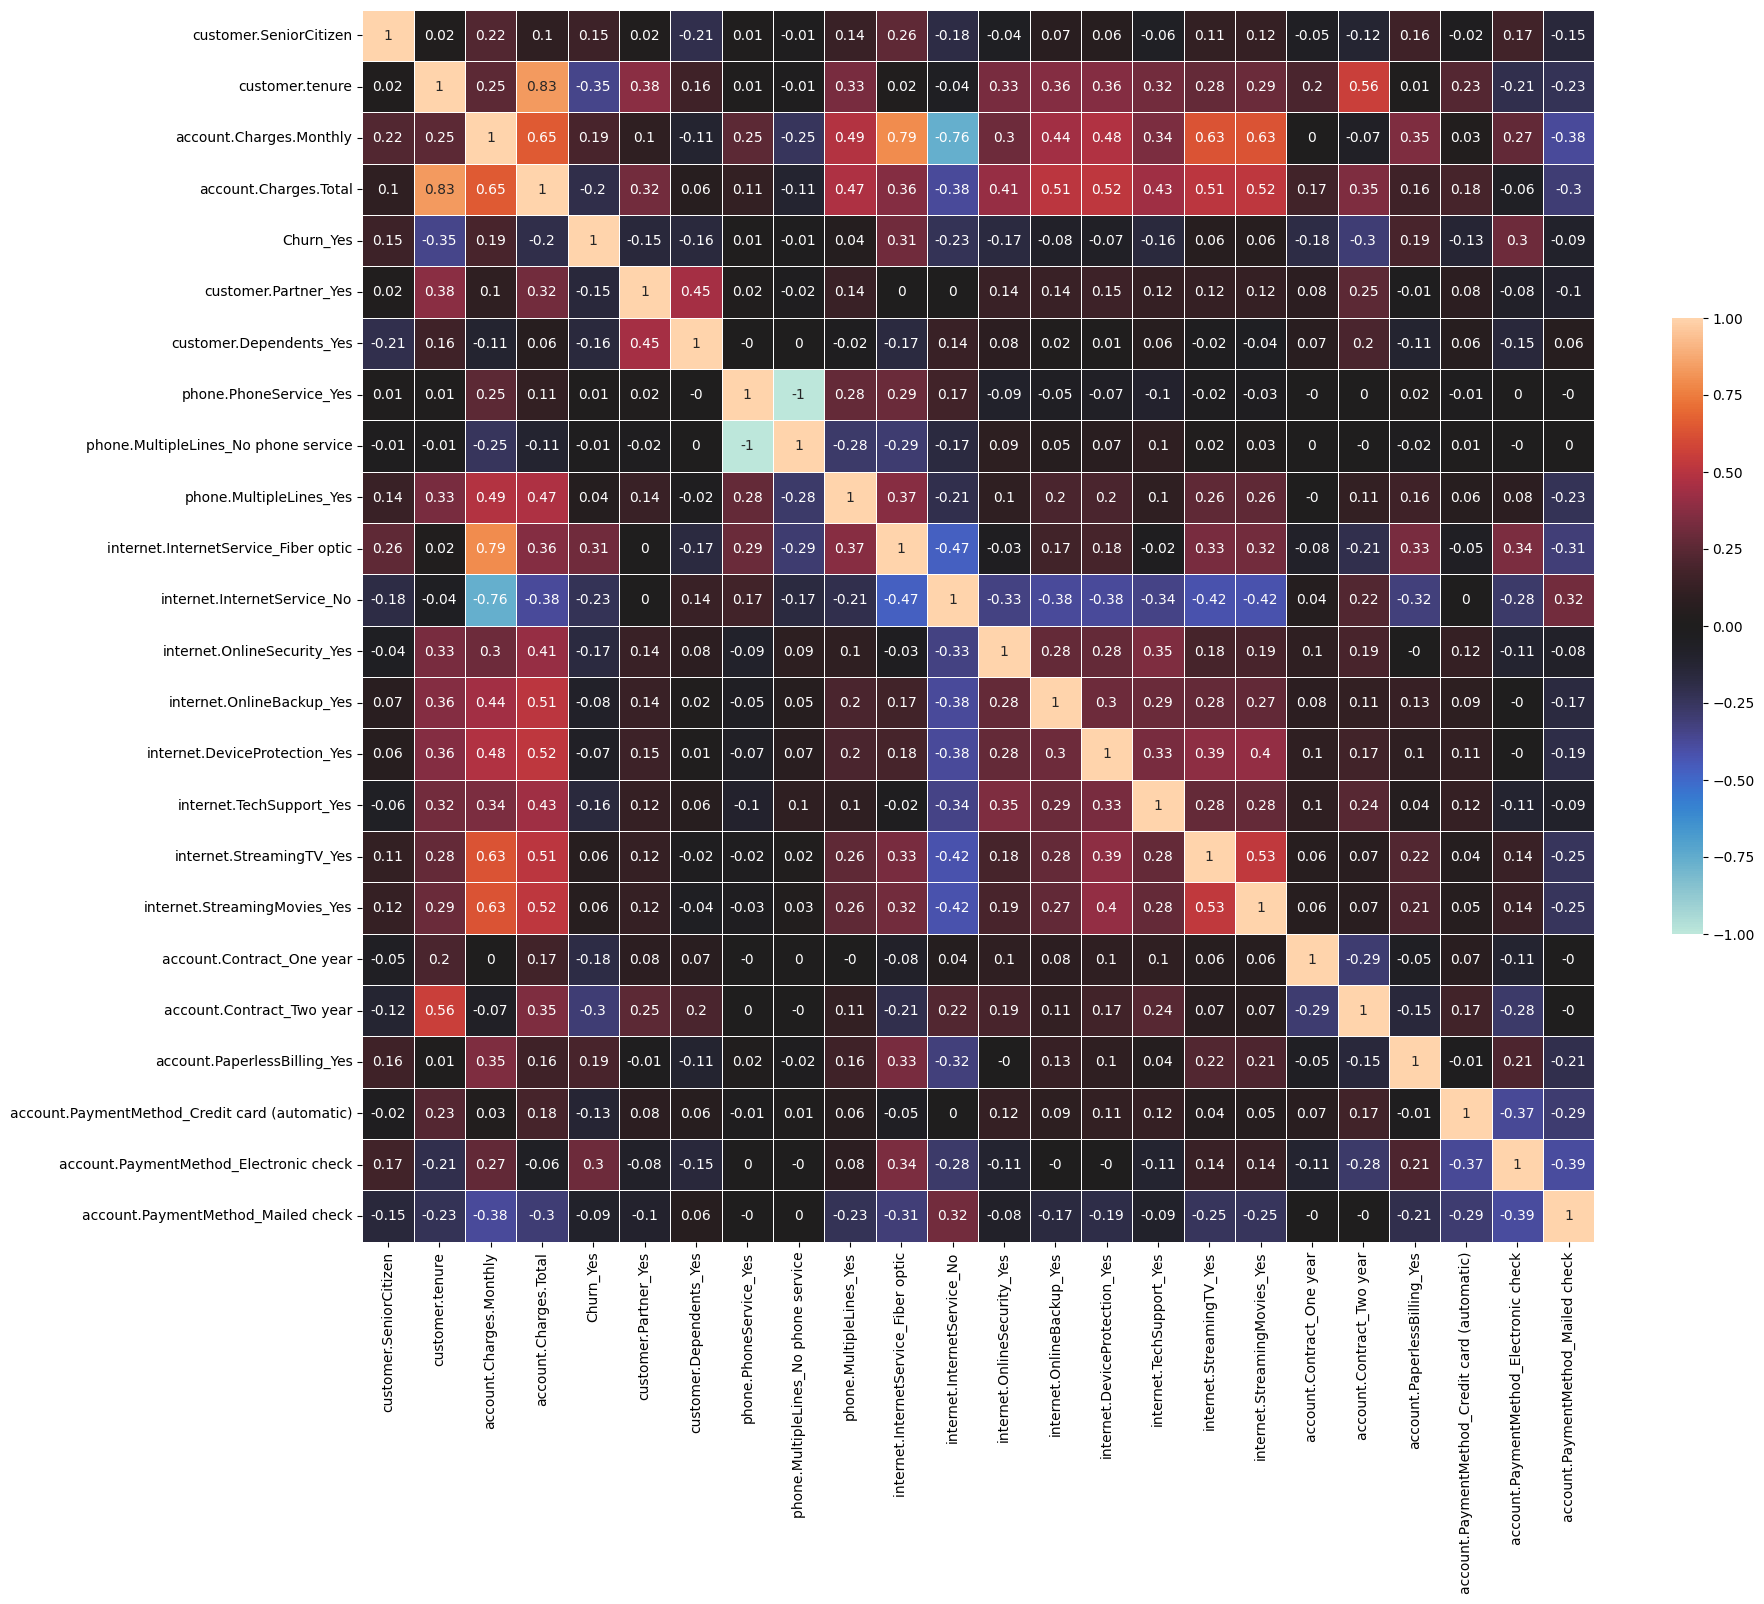

In [463]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(np.round(corr, 2), vmax =1, vmin = -1, center = 0, square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()


Al ser tantos valores, seleccionamos las variables que esten correlacionadas con la variable target, Churn_Yes, que superen un limite. Aplicamos una mascara

['customer.tenure', 'Churn_Yes', 'internet.InternetService_Fiber optic', 'internet.InternetService_No', 'account.Contract_Two year', 'account.PaymentMethod_Electronic check']


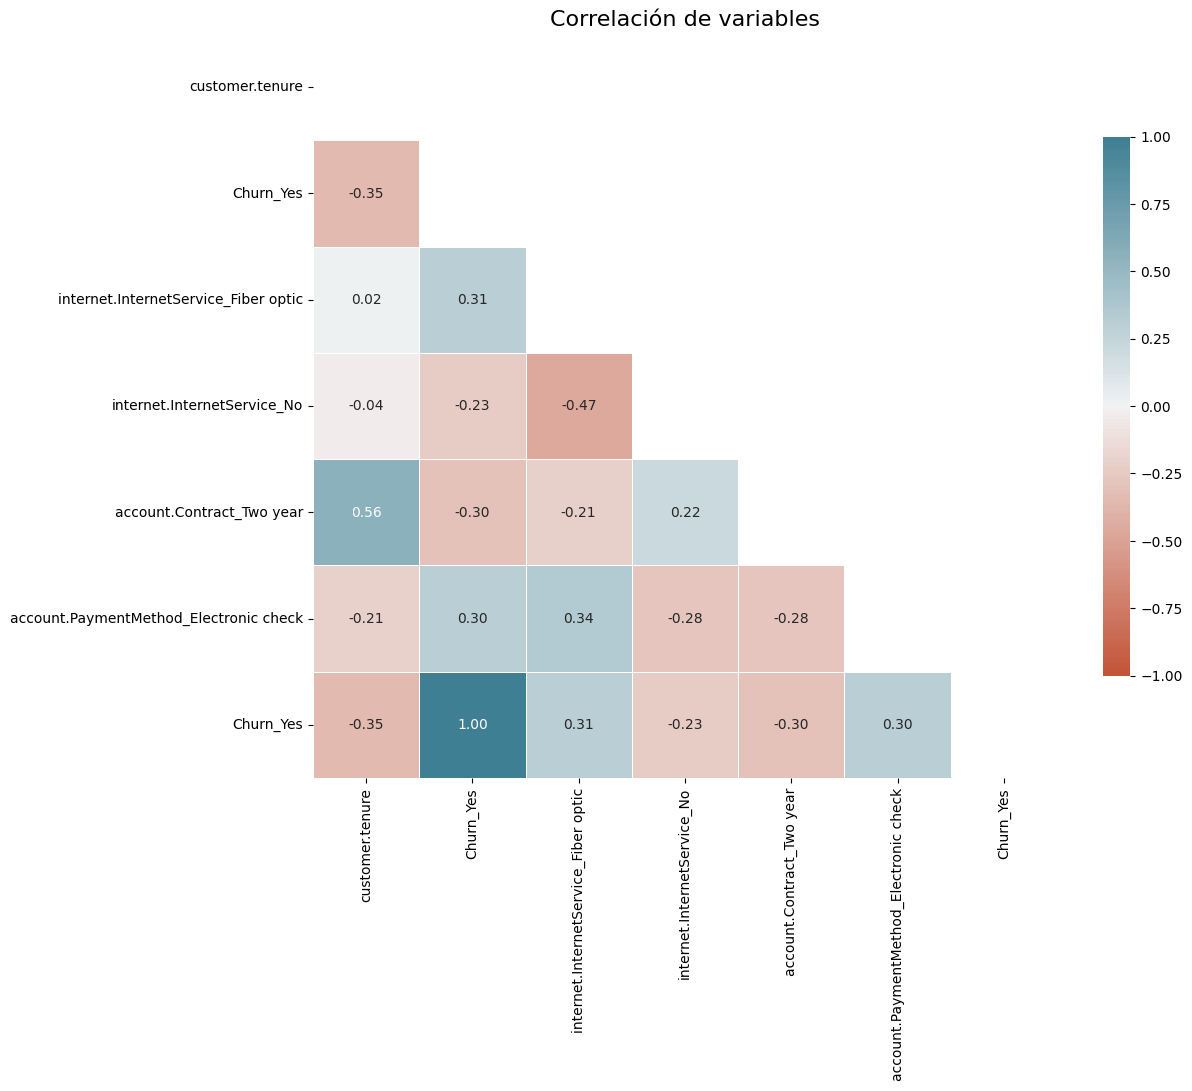

In [464]:
#Definimos la variable target
target_var = "Churn_Yes"

limite = 0.2

#filtramos las variables que tiene una correlacon absoluta mayor o igual al limite
var_relevantes = corr.index[abs(corr[target_var]) >= limite].to_list()
print(var_relevantes)

#corroborar que la variable target este en la lista
if target_var in var_relevantes:
  var_relevantes.append(target_var)

#creamos la matriz de correlacion con las variables seleccionadas
corr_relevantes = corr.loc[var_relevantes, var_relevantes]

#generamos una mascara para esconder el triangulo superior de la matriz, incluyendo la diagonal
mascara = np.triu(np.ones_like(corr_relevantes, dtype=bool))

#hacemos la grafica
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_relevantes,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink":0.7},
    mask = mascara
)
plt.title("Correlaci√≥n de variables", fontsize=16)
plt.show()


#Analisis Dirigido

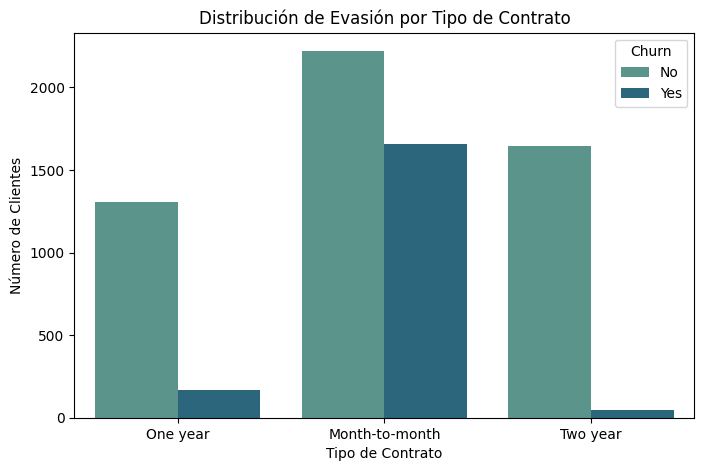

In [465]:
# Analisis de tipo de contrato y 'Churn'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='account.Contract', hue='Churn', palette='crest')
plt.title('Distribuci√≥n de Evasi√≥n por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('N√∫mero de Clientes')
plt.show()

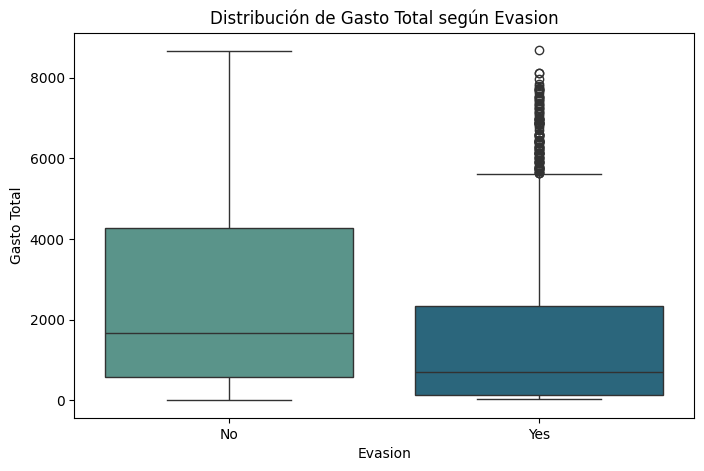

In [466]:
# Analisis de Gasto Total y 'Churn'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='account.Charges.Total', palette='crest')
plt.title('Distribuci√≥n de Gasto Total seg√∫n Evasion')
plt.xlabel('Evasion')
plt.ylabel('Gasto Total')
plt.show()

In [467]:
df_encoded["Churn_Yes"].value_counts(normalize=True)

Churn_Yes
False    0.73463
True     0.26537
Name: proportion, dtype: float64

ESta afectado, sesgado, se debe hacer balanceamiento

#Analisis de Multicolinealidad

In [468]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   account.Charges.Monthly                        7043 non-null   float64
 3   account.Charges.Total                          7043 non-null   float64
 4   Churn_Yes                                      7043 non-null   bool   
 5   customer.Partner_Yes                           7043 non-null   bool   
 6   customer.Dependents_Yes                        7043 non-null   bool   
 7   phone.PhoneService_Yes                         7043 non-null   bool   
 8   phone.MultipleLines_No phone service           7043 non-null   bool   
 9   phone.MultipleLines_Yes                        7043 

In [469]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [470]:
from sklearn.preprocessing import StandardScaler

df_dif = df_encoded.copy()

columnas_numericas = ["customer.tenure", "account.Charges.Monthly", "account.Charges.Total", "customer.SeniorCitizen"]

#Imicializamos la escala
scala = StandardScaler()

#aplicamos la escala a las columnas numericas
df_dif[columnas_numericas] = scala.fit_transform(df_dif[columnas_numericas])

display(df_dif.head())

customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0               -0.439916        -0.951682                 0.027862   
1               -0.439916        -0.951682                -0.161583   
2               -0.439916        -1.155283                 0.303720   
3                2.273159        -0.788800                 1.104706   
4                2.273159        -1.196004                 0.636080   

   account.Charges.Total  Churn_Yes  customer.Partner_Yes  \
0              -0.744026      False                  True   
1              -0.766482      False                 False   
2              -0.881874       True                 False   
3              -0.459662       True                  True   
4              -0.887808       True                  True   

   customer.Dependents_Yes  phone.PhoneService_Yes  \
0                     True                    True   
1                    False                    True   
2                    False                    True   
3                    False                    True   
4                    False                    True   

   phone.MultipleLines_No phone service  phone.MultipleLines_Yes  ...  \
0                                 False                    False  ...   
1                                 False                     True  ...   
2                                 False                    False  ...   
3                                 False                    False  ...   
4                                 False                    False  ...   

   internet.DeviceProtection_Yes  internet.TechSupport_Yes  \
0                          False                      True   
1                          False                     False   
2                           True                     False   
3                           True                     False   
4                          False                      True   

   internet.StreamingTV_Yes  internet.StreamingMovies_Yes  \
0                      True                         False   
1                     False                          True   
2                     False                         False   
3                      True                          True   
4                      True                         False   

   account.Contract_One year  account.Contract_Two year  \
0                       True                      False   
1                      False                      False   
2                      False                      False   
3                      False                      False   
4                      False                      False   

   account.PaperlessBilling_Yes  \
0                          True   
1                         False   
2                          True   
3                          True   
4                          True   

   account.PaymentMethod_Credit card (automatic)  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   account.PaymentMethod_Electronic check  account.PaymentMethod_Mailed check  
0                                   False                                True  
1                                   False                                True  
2                                    True                               False  
3                                    True                               False  
4                                   False                                True  

[5 rows x 24 columns]

In [471]:
X = df_encoded.drop(columns=["Churn_Yes"])
X_const = add_constant(X)

In [472]:
X_const = X_const.astype(float)

vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

display(vif_data.sort_values(by="VIF", ascending=False))

Variable         VIF
7                          phone.PhoneService_Yes         inf
8            phone.MultipleLines_No phone service         inf
3                         account.Charges.Monthly  864.964482
10           internet.InternetService_Fiber optic  148.241117
11                    internet.InternetService_No  104.210020
17                   internet.StreamingMovies_Yes   24.106279
16                       internet.StreamingTV_Yes   24.053437
4                           account.Charges.Total   10.791279
2                                 customer.tenure    7.527252
9                         phone.MultipleLines_Yes    7.272747
14                  internet.DeviceProtection_Yes    6.921808
13                      internet.OnlineBackup_Yes    6.780787
15                       internet.TechSupport_Yes    6.466600
12                    internet.OnlineSecurity_Yes    6.333581
19                      account.Contract_Two year    2.632177
22         account.PaymentMethod_Electronic check    1.975730
23             account.PaymentMethod_Mailed check    1.859932
18                      account.Contract_One year    1.622026
21  account.PaymentMethod_Credit card (automatic)    1.560544
5                            customer.Partner_Yes    1.462616
6                         customer.Dependents_Yes    1.384214
20                   account.PaperlessBilling_Yes    1.208928
1                          customer.SeniorCitizen    1.153361
0                                           const    0.000000

phone.PhoneSErvice_Yes y phone.MultipleLines_No phone service tienden a infinito

In [473]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Creo una copia
X_filtrada = X_const.copy()

# REmuevo las variables que tienden a infinito
cols_to_drop = [
    "phone.PhoneService_Yes",
    "phone.MultipleLines_No phone service"
]
X_filtrada.drop(columns=cols_to_drop, inplace=True)

#Borro datos redundantes
X_filtrada.drop(columns=["internet.InternetService_No"], inplace=True)

# Vuelvo a realizar VIF
X_filtrada = X_filtrada.astype(float)

vif_data = pd.DataFrame()
vif_data["feature"] = X_filtrada.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtrada.values, i) for i in range(X_filtrada.shape[1])]

display(vif_data.sort_values(by="VIF", ascending=False))

feature        VIF
0                                           const  35.523487
3                         account.Charges.Monthly  18.157790
4                           account.Charges.Total  10.685707
2                                 customer.tenure   7.492443
8            internet.InternetService_Fiber optic   6.996284
16                      account.Contract_Two year   2.512831
14                   internet.StreamingMovies_Yes   2.188764
13                       internet.StreamingTV_Yes   2.187277
19         account.PaymentMethod_Electronic check   1.967086
20             account.PaymentMethod_Mailed check   1.850380
12                       internet.TechSupport_Yes   1.735161
11                  internet.DeviceProtection_Yes   1.680839
9                     internet.OnlineSecurity_Yes   1.675413
7                         phone.MultipleLines_Yes   1.644497
10                      internet.OnlineBackup_Yes   1.625451
15                      account.Contract_One year   1.580499
18  account.PaymentMethod_Credit card (automatic)   1.560543
5                            customer.Partner_Yes   1.462195
6                         customer.Dependents_Yes   1.382914
17                   account.PaperlessBilling_Yes   1.199478
1                          customer.SeniorCitizen   1.148899

se elimina la columna Charges.Total porque es una combinacion de tenure y cobro mensual

In [474]:
X_filtrada.drop(columns=["account.Charges.Total"], inplace=True)

In [475]:
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_filtrada.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_filtrada.values, i) for i in range(X_filtrada.shape[1])]

# === Mostrar los resultados ordenados ===
display(vif_data_final.sort_values(by="VIF", ascending=False))

feature        VIF
0                                           const  28.730532
3                         account.Charges.Monthly  17.282320
7            internet.InternetService_Fiber optic   6.933121
2                                 customer.tenure   2.782187
15                      account.Contract_Two year   2.502475
12                       internet.StreamingTV_Yes   2.165476
13                   internet.StreamingMovies_Yes   2.164424
18         account.PaymentMethod_Electronic check   1.963865
19             account.PaymentMethod_Mailed check   1.827867
11                       internet.TechSupport_Yes   1.711953
10                  internet.DeviceProtection_Yes   1.653867
8                     internet.OnlineSecurity_Yes   1.650014
6                         phone.MultipleLines_Yes   1.629011
14                      account.Contract_One year   1.580369
9                       internet.OnlineBackup_Yes   1.579690
17  account.PaymentMethod_Credit card (automatic)   1.560164
4                            customer.Partner_Yes   1.461981
5                         customer.Dependents_Yes   1.382395
16                   account.PaperlessBilling_Yes   1.199267
1                          customer.SeniorCitizen   1.148777

#Modelos predictivos



In [476]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

In [477]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [478]:
#Normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [479]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [480]:
#Regresi√≥n logistica
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluaci√≥n
print("Regresi√≥n Log√≠stica")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusi√≥n:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresi√≥n Log√≠stica
Exactitud: 0.7458589682915286
ROC AUC: 0.840233750482386
Matriz de Confusi√≥n:
 [[1131  421]
 [ 116  445]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1552
        True       0.51      0.79      0.62       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



El modelo logra captar a la mayor√≠a de los clientes que se van (recall alto en True), aunque comete muchos falsos positivos (clientes que no se ir√≠an pero predice que s√≠)

In [481]:
#Random Forest
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluaci√≥n
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusi√≥n:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.7770941788925698
ROC AUC: 0.8232359602697686
Matriz de Confusi√≥n:
 [[1304  248]
 [ 223  338]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1552
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2113
   macro avg       0.72      0.72      0.72      2113
weighted avg       0.78      0.78      0.78      2113



Este modelo clasifica mejor a los clientes que permanecen (False), pero pierde m√°s casos reales de churn (recall m√°s bajo en True)

#Comparaci√≥n de modelos utilizados

**Random Forest** obtiene mayor exactitud general (0.78 vs 0.75) y un balance m√°s estable entre precisi√≥n y recall.

**Regresi√≥n Log√≠stica** destaca en el recall de la clase churn (0.79 vs 0.60), lo cual puede ser m√°s valioso en escenarios de negocio donde detectar clientes en riesgo es prioritario, aunque a costa de generar muchos falsos positivos.

*  Overfitting vs Underfitting

Regresi√≥n Log√≠stica: al ser un modelo lineal, no muestra se√±ales fuertes de overfitting. Su desempe√±o es consistente, pero podr√≠a estar subajustando (underfitting) algunos patrones complejos de los datos, especialmente en la clase True (churn).

Random Forest: muestra una mejor capacidad de ajuste en general (mejor exactitud), pero su menor recall en la clase churn puede sugerir que no est√° lo suficientemente calibrado para esa clase minoritaria. No hay evidencia clara de overfitting en los resultados actuales, pero s√≠ podr√≠a beneficiarse de un ajuste de hiperpar√°metros para mejorar la sensibilidad en churn.

*  Interpretaci√≥n pr√°ctica

El objetivo de negocio es minimizar la p√©rdida de clientes (churn), por ello Regresi√≥n Log√≠stica es preferible, ya que captura m√°s casos reales aunque con falsos positivos que despu√©s pueden gestionarse con campa√±as de fidelizaci√≥n.

*  **Conclusi√≥n:**

Random Forest se lleva el mejor desempe√±o general, con mayor exactitud y equilibrio, pero necesita ajustes para mejorar recall en churn. Regresi√≥n Log√≠stica es m√°s √∫til si la prioridad estrat√©gica es detectar la mayor cantidad de clientes que se van, incluso aceptando m√°s falsos positivos.

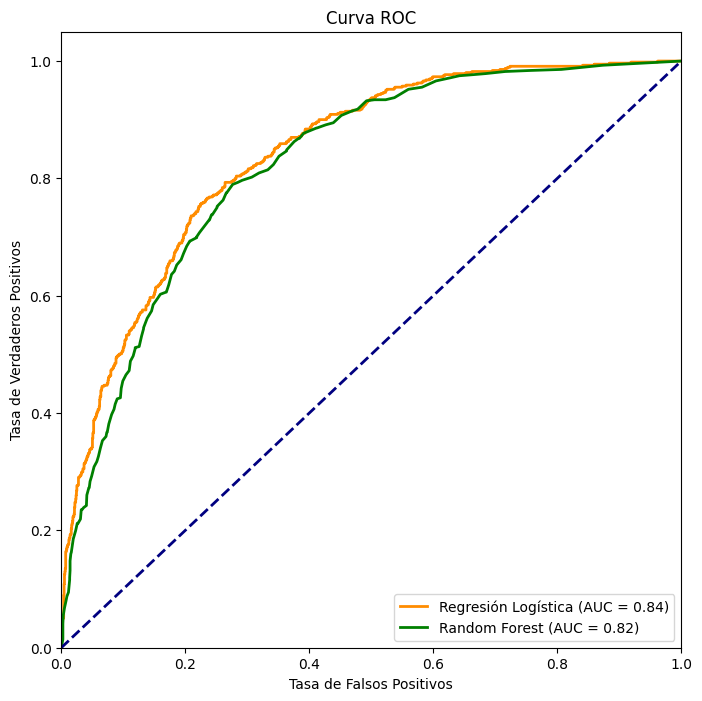

In [482]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular la curva ROC para cada modelo
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Graficar las curvas ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Regresi√≥n Log√≠stica (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#Analisis de la importancia de las variables en los modelos elegidos
En la Regresi√≥n Log√≠stica, variables como Meses de Contrato o Cobro Total suelen tener coeficientes significativos. Por ejemplo, un contrato m√°s largo puede disminuir la probabilidad de cancelaci√≥n. Por otro lado, variables como M√©todos de pago electr√≥nicos o cargos adicionales, sugiere que ciertas formas de pago o gastos adicionales est√°n correlacionados con una mayor tasa de cancelaci√≥n.
En Random Forest, se basa en la importancia de las variables calculada a partir de la reducci√≥n de la impureza en las divisiones de los √°rboles. Se mide cu√°nto contribuye cada variable a mejorar la clasificaci√≥n a lo largo del bosque de √°rboles.
Si una variable aparece frecuentemente en los nodos superiores y genera divisiones que reducen mucho la impureza, tendr√° una alta importancia.
Por ejemplo, Meses de Contrato, Tipo de Servicio o Cobro Mensual tienen los valores m√°s altos de importancia, dado que explican gran parte de la diferencia entre clientes que permanecen y los que cancelan.

La Regresi√≥n Log√≠stica aporta explicabilidad clara: sabemos exactamente qu√© variables aumentan o reducen el riesgo de cancelaci√≥n, y con qu√© magnitud. Esto es fundamental para el negocio porque permite dise√±ar estrategias dirigidas (ejemplo: reforzar beneficios para clientes con ciertos m√©todos de pago de riesgo).

El Random Forest, en cambio, aporta mayor capacidad predictiva y puede captar interacciones y no linealidades, aunque a costa de ser menos interpretable. Nos dice qu√© variables son las m√°s relevantes, pero no de qu√© manera impactan en la cancelaci√≥n.

**Conclusi√≥n:**

Para explicar el fen√≥meno y dise√±ar acciones de negocio, la Regresi√≥n Log√≠stica es m√°s √∫til, ya que ofrece insights claros y accionables. Para maximizar la predicci√≥n de cancelaciones, el Random Forest es superior, porque maneja mejor la complejidad de los datos y las relaciones no lineales.
Idealmente, ambos modelos se complementan: la regresi√≥n log√≠stica aporta interpretaci√≥n y el Random Forest potencia la capacidad de predicci√≥n.

#Conclusi√≥n Final
El an√°lisis realizado mediante Regresi√≥n Log√≠stica y Random Forest permiti√≥ identificar con claridad los factores que m√°s influyen en la cancelaci√≥n de clientes y evaluar la capacidad predictiva de ambos enfoques. Ambos modelos alcanzaron resultados aceptables, aunque con diferencias relevantes:

Random Forest obtuvo una mayor exactitud (0.78 vs 0.75) y un mejor balance entre clases, mostrando capacidad de modelar relaciones no lineales y complejas.

Regresi√≥n Log√≠stica, si bien alcanz√≥ un ROC AUC superior (0.84 vs 0.82), evidenci√≥ cierta limitaci√≥n en la precisi√≥n sobre la clase minoritaria (clientes que cancelan), lo que sugiere mayor riesgo de falsos negativos.

En el an√°lisis de variables, se observ√≥:

*  La duraci√≥n del contrato (Meses de Contrato) y el monto de facturaci√≥n mensual (Cobro Total) fueron determinantes en la probabilidad de cancelaci√≥n. Contratos de corto plazo y montos altos se asociaron con mayor riesgo de Evasi√≥n.

*  Variables relacionadas con servicios adicionales y caracter√≠sticas de la l√≠nea tambi√©n tuvieron peso significativo, en especial en el modelo de Random Forest, que destac√≥ la influencia de servicios espec√≠ficos sobre la retenci√≥n.

*  El modelo de Regresi√≥n Log√≠stica permiti√≥ observar direcciones claras: algunos servicios se correlacionaron positivamente con la cancelaci√≥n, mientras que otros actuaron como factores protectores.

**Factores principales que afectan la cancelaci√≥n**

Clientes con contratos cortos tienden a cancelar con mayor frecuencia.

Altos costos acumulados generan mayor probabilidad de abandono, especialmente en clientes recientes.

Menor adopci√≥n de servicios adicionales se asocia con mayor propensi√≥n a la cancelaci√≥n.

**Estrategias de retenci√≥n propuestas**

*  Fidelizaci√≥n con contratos de mayor duraci√≥n: incentivar a clientes de corto plazo a migrar a planes de contrato m√°s largos mediante descuentos o beneficios exclusivos.

*  Gesti√≥n de precios y beneficios: ofrecer planes personalizados o promociones a clientes con altos costos acumulados para reducir la percepci√≥n de carga econ√≥mica.

*  Servicios de valor agregado: estimular la adopci√≥n de servicios adicionales que fortalezcan la permanencia del cliente, generando un mayor ‚Äúcosto de salida‚Äù en t√©rminos de beneficios perdidos.

*  Alertas tempranas y segmentaci√≥n predictiva: aplicar los modelos desarrollados para detectar clientes con alto riesgo de churn y aplicar campa√±as espec√≠ficas de retenci√≥n.

En conclusi√≥n, la combinaci√≥n de modelos predictivos y el an√°lisis de variables relevantes brinda a la empresa una herramienta s√≥lida para anticipar la cancelaci√≥n de clientes y dise√±ar estrategias preventivas. El uso conjunto de Regresi√≥n Log√≠stica (por su capacidad interpretativa) y Random Forest (por su mayor desempe√±o general) ofrece un marco robusto tanto para la comprensi√≥n de los factores de Evasi√≥n como para la acci√≥n estrat√©gica de retenci√≥n.